In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tkinter import Tk
from tkinter.filedialog import askopenfilename

In [2]:
#For random centroid Initialization
def initKCentroids(X,K):
    randidx = np.random.permutation(X.shape[0]) #mx1 # 0 1 2 3 4 5 => 3 2 4 5 1 0 
    return X[randidx[0:K],:] #X[3,:] and X[2,:] returned for K = 2

In [3]:
#Returning the centroid number/index closest to the respective 
#training example Xi
def findClosestCentroids(X,centroids):  # X = (m,n) , centroids = (K,n)
    K = centroids.shape[0] #We get number of clusters 
    idx = np.zeros((X.shape[0],1))
    
    
    for i in range(X.shape[0]):
        for j in range(K):
            if j == 0:
                difference = X[i,:] - centroids[j,:]
                dif = np.sum(difference**2)
                idx[i] = j
            else:
                difference = X[i,:] - centroids[j,:]
                if np.sum(difference**2) < dif:
                    dif = np.sum(difference**2) 
                    idx[i] = j
                    
    return idx

In [4]:
#After alloting the centroids to Xi
#this computes the new centroid and updates the same
def computeCentroids(X,idx,K):
    m , n = X.shape
    centroids = np.zeros((K,n)) 
    occur = np.zeros((K,1))
    
    for i in range(m):
        index = int(np.squeeze(idx[i]))
        centroids[index,:] = centroids[index,:] + X[i,:] #Column wise addition
        occur[index] = occur[index] + 1
    
    return (np.divide(centroids,occur)) # Return K * n Matrix

In [5]:
#Used to display points and centroids after the KMeans process is complete
def display(X,centroids,idx):
    K = centroids.shape[0]
    m = X.shape[0]
    
    fig , ax = fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(15,10))
    color = "rgbky"
    for i in range(K):
        index_i_centroid = (idx == i).reshape(m,1)
        ax.scatter(X[index_i_centroid[:,0],0],X[index_i_centroid[:,0],1],c = color[i%5],s=40)
        
        
        
#    plt.scatter(X[:,0],X[:,1])
    plt.scatter(centroids[:,0],centroids[:,1],c = "m",s = 120)
    plt.tight_layout()

In [6]:
#Main KMeans Function that takes in initial Centroids
#and returns the final updated centroids after given iterations
#along with that, returns the index of each input feature
#belonging to a respective centroids
#KMeans for Image Compression 
def KMeans_Image(X,initial_centroids,max_iters):
    
    m,n = X.shape
    K = initial_centroids.shape[0]
    print("K is : ",K)
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m,1))
    
    for i in range(max_iters):
        
        idx = findClosestCentroids(X,centroids)
        centroids = computeCentroids(X,idx,K)
        
    
    return [centroids,idx]

(150, 150, 3)


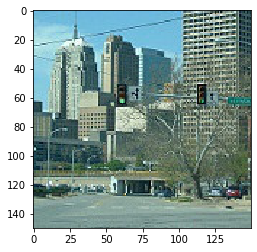

In [7]:
isPNG = False
Tk().withdraw()
filename = askopenfilename(title = "Choose a file")
image = imread(filename)
name = filename.split(".")
if name[1] == "png":
    isPNG = True
print(image.shape)
plt.imshow(image)

In [12]:
A = image.reshape(image.shape[0]*image.shape[1],image.shape[2])
print(A.shape)
A

(22500, 3)


array([[110, 181, 223],
       [109, 180, 222],
       [107, 181, 220],
       ...,
       [119, 146, 141],
       [122, 149, 144],
       [126, 153, 148]], dtype=uint8)

In [13]:
if isPNG:
    A
else:
    A = A / 255

In [14]:
print(A) #Normalized
K = 4
X = A
num_iters = 10
centroids , idx = KMeans_Image(X,initKCentroids(X,K),num_iters)

[[0.43137255 0.70980392 0.8745098 ]
 [0.42745098 0.70588235 0.87058824]
 [0.41960784 0.70980392 0.8627451 ]
 ...
 [0.46666667 0.57254902 0.55294118]
 [0.47843137 0.58431373 0.56470588]
 [0.49411765 0.6        0.58039216]]
K is :  4


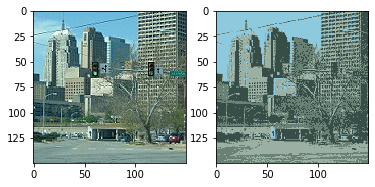

In [15]:
X_recovered = X.copy()
for i in range(K):
    X_recovered[(np.squeeze((idx == i))),:] = centroids[i]

X_recovered = X_recovered.reshape(image.shape[0],image.shape[1],image.shape[2])
A = A.reshape(image.shape[0],image.shape[1],image.shape[2])    

fig , axs = plt.subplots(1,2)

axs[0].imshow(A)
axs[1].imshow(X_recovered)
plt.imsave("kmeans_16.jpg",X_recovered)